<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _


In [1]:
# Imports needed for the script
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
data_non = pd.read_csv("datos_new.csv", sep = ';') 

names = data_non.columns
#data_non.columns = [''] * len(data_non.columns)
data_non.shape

(70, 487)

In [3]:
data_non = data_non.fillna(0)

In [4]:
#data_non.index = data_non.index.droplevel(0)
#data_non = data_non.reset_index()
#data_non.set_index(data_non.columns[0]).reset_index()
data_non.head(70)

,nombre,edad,diagnostico,lado,lateralidad,genero,escolaridad,years_em,years_demency,posee_hta,...,wmrhfrontalpole_whitematter,wmrhtemporalpole_whitematter,wmrhtransversetemporal_whitematter,wmrhinsula_whitematter,leftunsegmentedwhitematter_whitematter,rightunsegmentedwhitematter_whitematter,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter
0,esq-01-en,58,F203,1.0,DIESTRO,M,5,26,0,SI,...,237.5,624.9,596.2,8179.7,29409.6,29251.5,221752,222289,444042.0,1300000
1,esq-01-en,58,F203,2.0,DIESTRO,M,5,26,0,SI,...,237.5,624.9,596.2,8179.7,29409.6,29251.5,221752,222289,444042.0,1300000
2,esq-01-hc,62,C,1.0,DIESTRO,M,14,0,0,NO,...,234.1,643.2,680.8,9619.2,38461.8,37319.0,237701,238277,475978.0,1700000
3,esq-01-hc,62,C,2.0,DIESTRO,M,14,0,0,NO,...,234.1,643.2,680.8,9619.2,38461.8,37319.0,237701,238277,475978.0,1700000
4,esq-02-ed,79,F203-DEM.F001,1.0,DIESTRO,M,5,55,6,SI,...,475.5,1296.4,795.0,11020.7,21842.2,23099.9,264643,268662,533306.0,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,esq-13-hc,59,C,2.0,DIESTRO,M,16,0,0,NO,...,271.3,637.8,565.8,8341.8,27161.1,25354.3,206831,204116,410946.0,1300000
66,esq-14-hc,54,C,1.0,DIESTRO,M,18,0,0,NO,...,303.7,646.2,464.6,8241.7,26706.6,28135.7,208695,205077,413771.0,1200000
67,esq-14-hc,54,C,2.0,DIESTRO,M,18,0,0,NO,...,303.7,646.2,464.6,8241.7,26706.6,28135.7,208695,205077,413771.0,1200000
68,esq-15-hc,64,C,1.0,DIESTRO,M,16,0,0,NO,...,357.4,637.8,550.8,9450.3,27745.0,27229.7,228579,225270,453848.0,1400000


In [5]:
data_non['posee_hta_encoded'] = data_non['posee_hta'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['tecar_encoded'] = data_non['tecar'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['posee_dii_encoded'] = data_non['posee_dii'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['genero_encoded'] = data_non['genero'].map( {'M': 1, 'H': 0, 'm': 1, 'h': 0} ).astype(int)
data_non['lateralidad_encoded'] = data_non['lateralidad'].map( {'DIESTRO': 1, 'ZURDO': 0, 'diestro': 1, 'zurdo': 0} )#.astype(int)
data_non['diagnostico_encoded'] = data_non['diagnostico'].map( {'C': 0, 
                                                        'F200': 1, 
                                                        'F203': 1, 
                                                        'F203-DEM.F000': 2,
                                                        'F203-DEM-Z864-FO01': 2,
                                                        'F203-DEM.F001': 2,
                                                        'F203-DEM.F011': 2,
                                                        'F203-DEM.F020': 2} )#.astype(int)



In [6]:
data_non=data_non.fillna(0)
data_non.head(67)

,nombre,edad,diagnostico,lado,lateralidad,genero,escolaridad,years_em,years_demency,posee_hta,...,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter,posee_hta_encoded,tecar_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,esq-01-en,58,F203,1.0,DIESTRO,M,5,26,0,SI,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
1,esq-01-en,58,F203,2.0,DIESTRO,M,5,26,0,SI,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
2,esq-01-hc,62,C,1.0,DIESTRO,M,14,0,0,NO,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
3,esq-01-hc,62,C,2.0,DIESTRO,M,14,0,0,NO,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
4,esq-02-ed,79,F203-DEM.F001,1.0,DIESTRO,M,5,55,6,SI,...,264643,268662,533306.0,1200000,1,1,0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,esq-12-hc,57,C,1.0,DIESTRO,H,14,0,0,NO,...,264643,265777,530420.0,1500000,0,0,0,0,1.0,0
63,esq-12-hc,57,C,2.0,DIESTRO,H,14,0,0,NO,...,264643,265777,530420.0,1500000,0,0,0,0,1.0,0
64,esq-13-hc,59,C,1.0,DIESTRO,M,16,0,0,NO,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0
65,esq-13-hc,59,C,2.0,DIESTRO,M,16,0,0,NO,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0


In [7]:
drop_elements = ['nombre','posee_hta','posee_dii','genero','lateralidad','diagnostico','tecar','years_demency','tipico','atipico','deposito','meses_con_antipsicotico']
data_encoded = data_non.drop(drop_elements, axis = 1)
data_encoded.head(35)
names = data_encoded.columns

In [8]:
data_encoded.shape

(70, 481)

In [68]:
#data_encoded = data_encoded.replace('\d*\.?\d+','\d*\,?\d+', regex=True)

data_encoded.head(70)

,edad,lado,escolaridad,years_em,depression,hachinski_ischemia_score,cdr,ace,mmse,letter_f,...,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter,posee_hta_encoded,tecar_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,58,1.0,5,26,0,2,0.0,76,27,6,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
1,58,2.0,5,26,0,2,0.0,76,27,6,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
2,62,1.0,14,0,2,1,0.0,100,30,5,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
3,62,2.0,14,0,2,1,0.0,100,30,5,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
4,79,1.0,5,55,12,2,2.0,33,14,0,...,264643,268662,533306.0,1200000,1,1,0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,59,2.0,16,0,0,1,0.0,93,30,18,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0
66,54,1.0,18,0,1,0,0.0,98,29,15,...,208695,205077,413771.0,1200000,0,0,0,1,1.0,0
67,54,2.0,18,0,1,0,0.0,98,29,15,...,208695,205077,413771.0,1200000,0,0,0,1,1.0,0
68,64,1.0,16,0,0,0,0.5,100,30,19,...,228579,225270,453848.0,1400000,0,0,0,1,1.0,0


In [69]:
x = data_encoded.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)

data_scaled.shape
data_scaled.columns = names
data_scaled.head(35)

,edad,lado,escolaridad,years_em,depression,hachinski_ischemia_score,cdr,ace,mmse,letter_f,...,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter,posee_hta_encoded,tecar_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,0.382353,0.5,0.227273,0.472727,0.000000,0.50,0.000000,0.647059,0.842105,0.315789,...,0.287629,0.365416,0.328329,0.166667,1.0,0.0,0.0,1.0,1.0,0.5
1,0.382353,1.0,0.227273,0.472727,0.000000,0.50,0.000000,0.647059,0.842105,0.315789,...,0.287629,0.365416,0.328329,0.166667,1.0,0.0,0.0,1.0,1.0,0.5
2,0.500000,0.5,0.636364,0.000000,0.166667,0.25,0.000000,1.000000,1.000000,0.263158,...,0.405143,0.472777,0.440528,0.833333,0.0,0.0,0.0,1.0,1.0,0.0
3,0.500000,1.0,0.636364,0.000000,0.166667,0.25,0.000000,1.000000,1.000000,0.263158,...,0.405143,0.472777,0.440528,0.833333,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000000,0.5,0.227273,1.000000,1.000000,0.50,0.222222,0.014706,0.157895,0.000000,...,0.603655,0.676815,0.641935,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
5,1.000000,1.0,0.227273,1.000000,1.000000,0.50,0.222222,0.014706,0.157895,0.000000,...,0.603655,0.676815,0.641935,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
6,0.352941,0.5,0.227273,0.418182,0.166667,0.25,0.222222,0.720588,0.684211,0.210526,...,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,1.0,1.0,0.5
7,0.352941,1.0,0.227273,0.418182,0.166667,0.25,0.222222,0.720588,0.684211,0.210526,...,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,1.0,1.0,0.5
8,0.882353,0.0,0.636364,0.000000,0.000000,0.25,0.055556,0.911765,1.000000,0.263158,...,0.301827,0.338408,0.320967,0.083333,0.0,0.0,0.0,1.0,1.0,0.0
9,0.882353,0.0,0.636364,0.000000,0.000000,0.25,0.055556,0.911765,1.000000,0.263158,...,0.301827,0.338408,0.320967,0.083333,0.0,0.0,0.0,1.0,1.0,0.0


In [70]:
#Ultima variable de archivo de Funcionalidades de pacientes
idx_n = -1
for idx in data_scaled.columns:
    idx_n = idx_n + 1
    if idx == "fcsrt_cued_recall_score":
        print(idx_n)


23


In [71]:
corr = stats.spearmanr(data_scaled)
correlation_matrix = corr.correlation

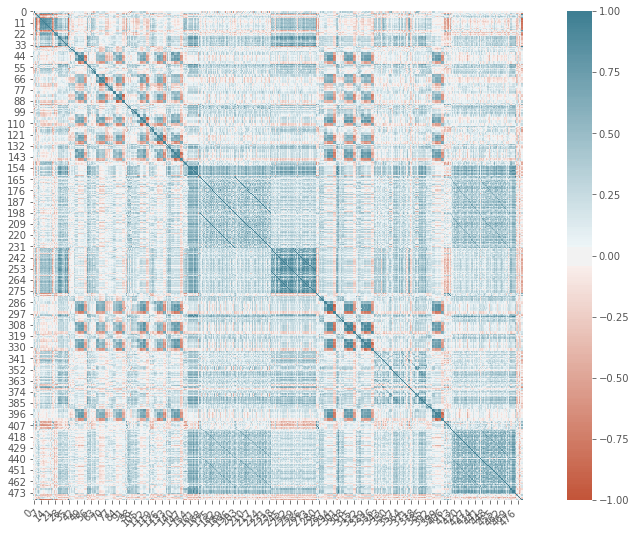

In [72]:

ax = sb.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

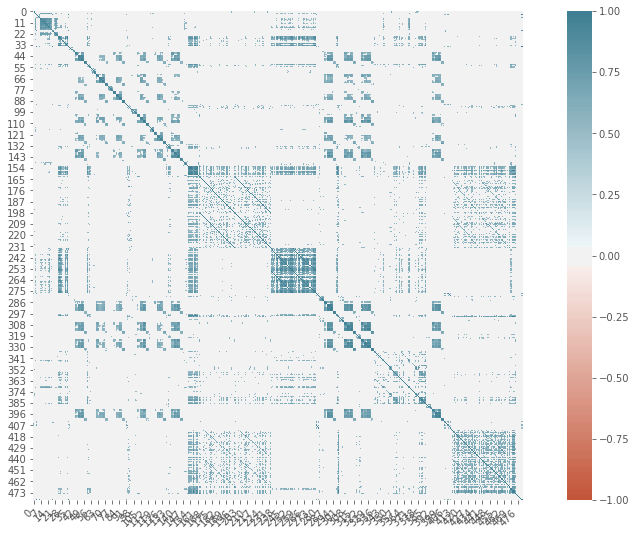

In [73]:
new_corr = (correlation_matrix > 0.5) * correlation_matrix

ax = sb.heatmap(
    new_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [74]:
cantidad_vars=0
for col in range(23):
    for row in range(new_corr.shape[0]):
        if new_corr[row][col] > 0:
            cantidad_vars = cantidad_vars + 1 
            print(data_scaled.columns[col]+"    <-->    "+data_scaled.columns[row])
print("Cantidad: "+ str(cantidad_vars))

edad    <-->    edad
edad    <-->    rdventricle_iii_iv_ventricules
edad    <-->    rightlateralventricle_ventricles
edad    <-->    rightinflatvent_ventricles
edad    <-->    rdventricle_ventricles
lado    <-->    lado
lado    <-->    frontalpole_graymatter
lado    <-->    parsorbitalis_graymatter_xi
lado    <-->    frontalpole_graymatter_xi
lado    <-->    PuL_talamo
lado    <-->    pua_thalamicnuclei
lado    <-->    pui_thalamicnuclei
lado    <-->    pul_thalamicnuclei
escolaridad    <-->    escolaridad
escolaridad    <-->    ace
escolaridad    <-->    mmse
escolaridad    <-->    letter_f
escolaridad    <-->    animal_fluency
escolaridad    <-->    letter_s
escolaridad    <-->    hvlt_palabras_de_rey_total_recall
escolaridad    <-->    hvlt_delayed_recall
escolaridad    <-->    rey_figure_copy
escolaridad    <-->    rey_figure_immediate_recall
escolaridad    <-->    rey_figure_delayed_recalled
escolaridad    <-->    digit_span
escolaridad    <-->    boston_naming_test
escolaridad   

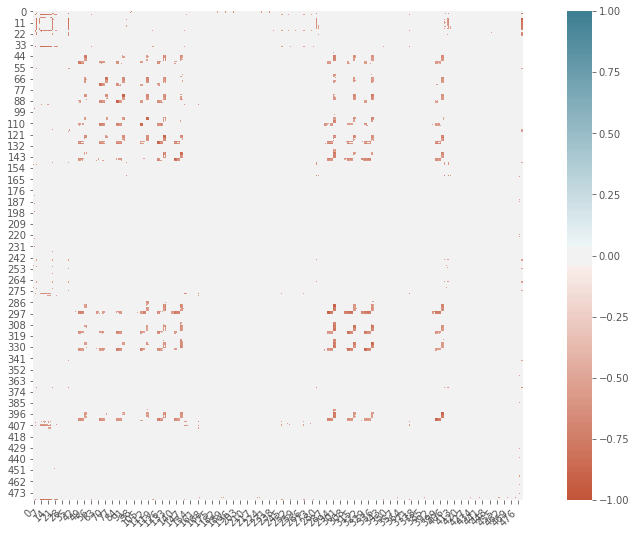

In [75]:
new_corr_neg = (correlation_matrix < -0.5) * correlation_matrix

ax = sb.heatmap(
    new_corr_neg, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [76]:
cantidad_vars=0
for col in range(23):
    for row in range(new_corr_neg.shape[0]):
        if new_corr_neg[row][col] < 0:
            cantidad_vars = cantidad_vars + 1 
            print(data_scaled.columns[col]+"    <-->    "+data_scaled.columns[row])
print("Cantidad: "+ str(cantidad_vars))

edad    <-->    cc_mid_anterior_generalsegmentation
edad    <-->    lhfimbria_hippocampus
edad    <-->    lhfimbria_hp
lado    <-->    wmlhrostralanteriorcingulate_cingulate
lado    <-->    parsopercularis_graymatter
lado    <-->    rostralanteriorcingulate_graymatter
lado    <-->    transversetemporal_graymatter
lado    <-->    rostralanteriorcingulate_graymatter_xi
lado    <-->    transversetemporal_graymatter_xi
escolaridad    <-->    years_em
escolaridad    <-->    tmt_a
escolaridad    <-->    tmt_b
escolaridad    <-->    group
escolaridad    <-->    rdventricle_iii_iv_ventricules
escolaridad    <-->    leftinflatvent_ventricles
escolaridad    <-->    rdventricle_ventricles
escolaridad    <-->    diagnostico_encoded
years_em    <-->    escolaridad
years_em    <-->    ace
years_em    <-->    mmse
years_em    <-->    letter_f
years_em    <-->    animal_fluency
years_em    <-->    letter_s
years_em    <-->    hvlt_palabras_de_rey_total_recall
years_em    <-->    hvlt_delayed_recall
ye

array([[ 0., -0.,  0., ..., -0.,  0.,  0.],
       [-0.,  0.,  0., ..., -0., -0.,  0.],
       [ 0.,  0.,  0., ..., -0., -0.,  0.],
       ...,
       [-0., -0., -0., ...,  0.,  0., -0.],
       [ 0., -0., -0., ...,  0.,  0., -0.],
       [ 0.,  0.,  0., ..., -0., -0.,  0.]])